In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [7]:

# Lista de las columnas que quieres seleccionar
columnas_a_cargar = ['SDT', 'pH_CAMPO', 'OD_%', 'TEMP_AMB', 'TEMP_AGUA', 'N_TOT']  # Cambia los nombres según tus columnas

# Lee el archivo CSV y lo convierte en un DataFrame
df = pd.read_csv('C:\\Users\\Alienware X15\\Desktop\\tesis\\BDreconstruccion\\BDWeka\\BDentrenamientoWeka.csv', usecols=columnas_a_cargar)

# Muestra las primeras filas del DataFrame para verificar que se ha cargado correctamente
print(df.head())


    N_TOT       SDT  pH_CAMPO   OD_%  TEMP_AMB  TEMP_AGUA
0  0.0095  51280.00      8.06  100.1     32.10      29.10
1  0.0193  30189.60      6.48   64.3     29.30      29.72
2  0.0224    161.92      8.68  139.4     28.81      30.63
3  0.0464  37600.00      8.09  104.4     25.40      21.20
4  0.0511    318.72      8.13   80.8     25.36      25.32


X_train_scaled shape: (2441, 5)
X_test_scaled shape: (611, 5)
y_train shape: (2441,)
y_test shape: (611,)
Epoch 1/100


c:\Users\Alienware X15\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 59.1727 - val_loss: 32.1734
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31.8341 - val_loss: 24.3906
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.3453 - val_loss: 21.6393
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 24.4715 - val_loss: 20.5406
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 22.3978 - val_loss: 19.1414
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.8332 - val_loss: 18.2241
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.6065 - val_loss: 17.7433
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.2016 - val_loss: 18.8830
Epoch 9/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 19.2047 - val_loss: 16.3430
Epoch 10/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.9727 - val_loss: 16.2456
Epoch 11/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.6967 - val_loss: 15.7634
Epoch 12/100
196/196 ━━━

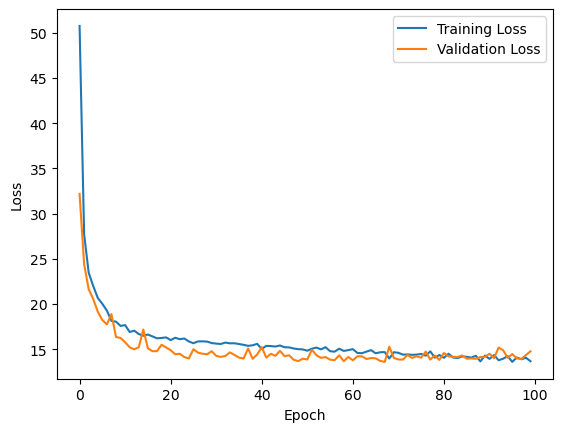

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

# Asignar las variables de entrada (X) y la variable de salida (y)
X = df.drop(columns=['N_TOT'])  # Todas las columnas excepto 'N_TOT'
y = df['N_TOT']  # La columna 'N_TOT' como variable de salida

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos de entrada
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Asegurarse de que las etiquetas sean arrays unidimensionales
y_train = y_train.values
y_test = y_test.values

# Verificar las formas
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Definir el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),  # Aumentar el tamaño de la capa oculta
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo con validación
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

# Realizar predicciones
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Evaluar el modelo (usando el error cuadrático medio)
mse_train = np.mean(np.square(y_train - y_pred_train.flatten()))
mse_test = np.mean(np.square(y_test - y_pred_test.flatten()))

print(f'Error Cuadrático Medio en Entrenamiento: {mse_train}')
print(f'Error Cuadrático Medio en Prueba: {mse_test}')

# Visualización de las curvas de aprendizaje
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/200


c:\Users\Alienware X15\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 82.0108 - val_loss: 72.4606
Epoch 2/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.3304 - val_loss: 66.5701
Epoch 3/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.4469 - val_loss: 63.2022
Epoch 4/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62.3467 - val_loss: 59.2562
Epoch 5/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.3659 - val_loss: 53.7929
Epoch 6/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.1549 - val_loss: 49.5219
Epoch 7/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45.9312 - val_loss: 43.3104
Epoch 8/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43.5643 - val_loss: 39.2306
Epoch 9/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.3938 - val_loss: 34.1543
Epoch 10/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.7789 - val_loss: 32.3517
Epoch 11/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32.2904 - val_loss: 29.3798
Epoch 12/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

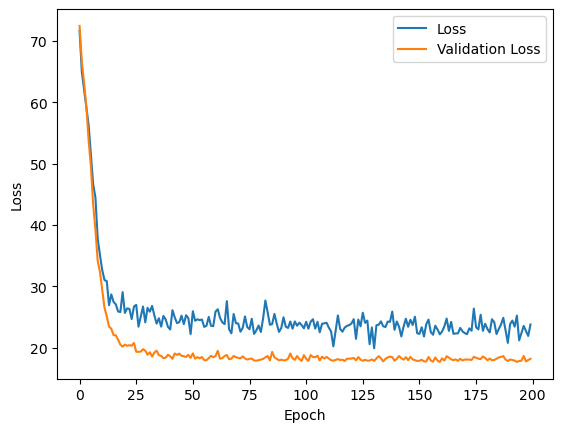

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras import regularizers

# Asignar las variables de entrada (X) y la variable de salida (y)
X = df.drop(columns=['N_TOT'])
y = df['N_TOT']

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos de entrada
scaler = MinMaxScaler()  # Cambiado a MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Asegurarse de que las etiquetas sean arrays unidimensionales
y_train = y_train.values
y_test = y_test.values

# Definir el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, verbose=1, validation_split=0.2)

# Realizar predicciones
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Evaluar el modelo (usando el error cuadrático medio)
mse_train = np.mean(np.square(y_train - y_pred_train.flatten()))
mse_test = np.mean(np.square(y_test - y_pred_test.flatten()))

print(f'Error Cuadrático Medio en Entrenamiento: {mse_train}')
print(f'Error Cuadrático Medio en Prueba: {mse_test}')

# Visualización de las curvas de aprendizaje
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
